<img src="images/dimokriteio2.png" style="width:200px; float: left; margin: 40px 40px 40px 40px;"></img>
<img src="images/deyak.png" style="width:100px; float: up; margin: 40px 40px 40px 40px;"></img>


<img src="https://user-images.githubusercontent.com/7065401/55025843-7d99a280-4fe0-11e9-938a-4879d95c4130.png"
    style="width:80px; float: right; margin: 40px 40px 40px 40px;"></img>

# Δημόσια Επιχείρηση Ύδρευσης
**Εργασία Εξαμήνου στο μάθημα Αναλυτική Μεγάλων Δεδομένων** 

**Στοιχεία Φοιτητών:** Αναστάσιος Καρύδης 91931, Ιωάννης Χαριζόπουλος 92003

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


**Επιχειρησιακοί Κανόνες Βάσης Δεδομένων:**
* Για τις ανάγκες τις εργασίας αναγράφονται οι επιχειρησιακοί κανόνες της βάσης.
 
 Κατά την σχεδίαση βάσης δεδομένων για την ΔΕΥΑK, με στόχο την διαχείριση των πελατών και τις πληροφορίες που θα πρέπει να υπάρχουν για κάθε πελάτη, καταγράφηκαν οι παρακάτω πληροφορίες: 
 
1. Για κάθε πελάτη κρατάμε τον αριθμό φορολογικού μητρώου του (ΑΦΜ),το ονοματεπώνυμο και το είδος του πελάτη (CustType) εαν πρόκειται για φυσικό πρόσωπο η νομική οντότητα. 

2. Σε κάθε πελάτη μπορεί να αντιστοιχούν περισσότερες από μία διευθύνσεις, ενώ μια διεύθυνση μπορεί να αντιστοιχεί και σε περισσότερους από ένα πελάτες, εφόσον μένουν σε πολυκατοικία. Για κάθε διεύθυνση χρειάζεται να κρατάμε την Οδό, τον αριθμό και τον Ταχυδρομικό Κώδικα.

3. Για κάθε πελάτη έχει εγκατασταθεί μετρητής με μοναδικό αριθμό υδρομέτρου, ενώ ταυτόχρονα θα πρέπει να προσδιορίζεται και το είδος του υδρομέτρου.

4. Η ένδειξη του μετρητή θα διαβάζεται άπο τον εργαζόμενο της υπηρεσίας. Ο κάθε υπάλληλος έχει έναν μοναδικό κωδικό και επιπλέον κρατάμε την θέση εργασίας του και το ονοματεπώνυμό του.

5. Για τον κάθε λογαριασμό χρησιμοποιούνται τα δεδομένα από την μέτρηση του αντίστοιχου μετρητή υδρομέτρου. Έπειτα εκδίδεται ο λογαριασμός για τον πελάτη με μοναδικό αριθμό λογαριασμού και στοιχεία όπως ημερομηνία έκδοσης του λογαριασμού και ημερομηνία λήξης του λογαριασμού.

6. Στην μέτρηση είναι χρήσιμο να κρατάμε ακόμα και την πρώτη μέτρηση, την τελευταία μέτρηση καθώς και τις ημερομηνίες τους. (Ημερομηνία έναρξης Μέτρησης, Ημερομηνία Ληξης Μέτρησης)


   ## ΜΟΝΤΕΛΟ ΟΝΤΟΤΗΤΩΝ ΣΥΣΧΕΤΙΣΕΩΝ

<img src="images/MOS_DEYA.png" style="width:1000px; float: mid; margin: 50px 50px 50px 50px;"></img>

## Μετατροπή του ΜΟΣ σε σχεσιακό μοντέλο
 Με βάση τους κανόνες 1-6 
 Για ευκολία θα χρησιμοποιήσουμε αγγλικούς όρους.

* Customer(AFM, CustName, CustType)
    Primary Keys: AFM
    Foreign Key: BillNo , MeterNo

* Meter(MeterNo,  MtrModel, BillStartDate, BillLastDate, PrevMeterNoVAL, NowMeterNoVAL, Consumption)
    Primary Key: MeterNo
    Foreign Key: AFM, BillNo, EmpNo

* Payment(IDpayment,PaymentType , PayDate)
    Primary Key: IDpayment
    Foreign Key: BillNo

* Bill(BillNo, BillPublishDate, BillExpireDate)
    Primary Key: BillNo
    Foreign Key: AFM, IDpayment, MeterNo

* Employee(EmpNo, EmpName, EmpTitle)
    Primary Key: EmpNo
    Foreign Key: MeterNo

* Address(IDAddress, TK, Street , Number)
    Primary Key: ID Address
    Foreign Key: 
    
* Antistoixei(AFM, IDAddress)
    Primary Key: AFM, IDAddress
    Foreign Key: AFM, IDAddress


In [1]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import pandas as pd
import numpy as np

In [2]:
%load_ext sql
import pandas as pd
%sql sqlite:///Deya.db

'Connected: @Deya.db'

In [3]:

%%sql
CREATE TABLE Customer( AFM NUMBER(9) , CustName VARCHAR(30), CustType CHAR(6), BillNo NUMBER(12), MeterNo INTEGER, PRIMARY KEY (AFM), 
                      FOREIGN KEY (BillNo) REFERENCES Bill, FOREIGN KEY(MeterNo) REFERENCES Meter);
CREATE TABLE Address( IDAddress NUMBER(7) ,TK NUMBER(5) , Street VARCHAR(25) , Number INTEGER,  PRIMARY KEY (IDAddress));

CREATE TABLE Meter( MeterNo INTEGER, MtrModel CHAR(7), BillStartDate DATE, BillLastDate DATE, PrevMeterNoVAL INTEGER , NowMeterNoVAL INTEGER, Consumption INTEGER, AFM NUMBER(9), BillNo NUMBER(12), EmpNo INTEGER, PRIMARY KEY (MeterNo), 
                   FOREIGN KEY (AFM) REFERENCES Customer, FOREIGN KEY (BillNo) REFERENCES Bill , FOREIGN KEY (EmpNo) REFERENCES Employee);

CREATE TABLE Bill( BillNo NUMBER(12), BillPublishDate DATE, BillExpireDate DATE, AFM NUMBER(9), IDpayment INTEGER, MeterNo INTEGER ,  
                      PRIMARY KEY (BillNo), FOREIGN KEY (AFM) REFERENCES Customer, FOREIGN KEY (IDpayment) REFERENCES Payment, 
                     FOREIGN KEY (MeterNo) REFERENCES Meter);

CREATE TABLE Payment( IDpayment INTEGER, PaymentType VARCHAR(10) , PayDate DATE , BillNo NUMBER(12) , PRIMARY KEY (IDpayment), FOREIGN KEY (BillNo) REFERENCES Bill );

CREATE TABLE Employee( EmpNo INTEGER, EmpName VARCHAR(30), EmpTitle VARCHAR(20), MeterNo INTEGER, PRIMARY KEY (EmpNo), FOREIGN KEY (MeterNo) REFERENCES Meter);

CREATE TABLE Antistoixei (AFM NUMBER(9), IDAddress NUMBER(7), PRIMARY KEY (AFM, IDAddress), FOREIGN KEY (AFM) REFERENCES Customer, FOREIGN KEY (IDAddress) REFERENCES Address )


 * sqlite:///Deya.db
Done.
Done.
Done.
Done.
Done.
Done.
Done.


[]

## Αφού δημιουργήσαμε την βάση με τους πίνακες, τώρα θα γεμίσουμε την βάση με εγγραφές
1. Αρχικά εμφανίζω τους πίνακες να δώ ότι όλα είναι σωστά

In [4]:
%%sql
SELECT * FROM sqlite_master;

 * sqlite:///Deya.db
Done.


[('table', 'Customer', 'Customer', 2, 'CREATE TABLE Customer( AFM NUMBER(9) , CustName VARCHAR(30), CustType CHAR(6), BillNo NUMBER(12), MeterNo INTEGER, PRIMARY KEY (AFM), \n                      FOREIGN KEY (BillNo) REFERENCES Bill, FOREIGN KEY(MeterNo) REFERENCES Meter)'),
 ('index', 'sqlite_autoindex_Customer_1', 'Customer', 3, None),
 ('table', 'Address', 'Address', 4, 'CREATE TABLE Address( IDAddress NUMBER(7) ,TK NUMBER(5) , Street VARCHAR(25) , Number INTEGER,  PRIMARY KEY (IDAddress))'),
 ('index', 'sqlite_autoindex_Address_1', 'Address', 5, None),
 ('table', 'Meter', 'Meter', 6, 'CREATE TABLE Meter( MeterNo INTEGER, MtrModel CHAR(7), BillStartDate DATE, BillLastDate DATE, PrevMeterNoVAL INTEGER , NowMeterNoVAL INTEGER, Consump ... (76 characters truncated) ... MeterNo), \n                   FOREIGN KEY (AFM) REFERENCES Customer, FOREIGN KEY (BillNo) REFERENCES Bill , FOREIGN KEY (EmpNo) REFERENCES Employee)'),
 ('table', 'Bill', 'Bill', 7, 'CREATE TABLE Bill( BillNo NUMBER(12), BillPublishDate DATE, BillExpireDate DATE, AFM NUMBER(9), IDpayment INTEGER, MeterNo INTEGER ,  \n              ... (27 characters truncated) ... o), FOREIGN KEY (AFM) REFERENCES Customer, FOREIGN KEY (IDpayment) REFERENCES Payment, \n                     FOREIGN KEY (MeterNo) REFERENCES Meter)'),
 ('index', 'sqlite_autoindex_Bill_1', 'Bill', 8, None),
 ('table', 'Payment', 'Payment', 9, 'CREATE TABLE Payment( IDpayment INTEGER, PaymentType VARCHAR(10) , PayDate DATE , BillNo NUMBER(12) , PRIMARY KEY (IDpayment), FOREIGN KEY (BillNo) REFERENCES Bill )'),
 ('table', 'Employee', 'Employee', 10, 'CREATE TABLE Employee( EmpNo INTEGER, EmpName VARCHAR(30), EmpTitle VARCHAR(20), MeterNo INTEGER, PRIMARY KEY (EmpNo), FOREIGN KEY (MeterNo) REFERENCES Meter)'),
 ('table', 'Antistoixei', 'Antistoixei', 11, 'CREATE TABLE Antistoixei (AFM NUMBER(9), IDAddress NUMBER(7), PRIMARY KEY (AFM, IDAddress), FOREIGN KEY (AFM) REFERENCES Customer, FOREIGN KEY (IDAddress) REFERENCES Address )'),
 ('index', 'sqlite_autoindex_Antistoixei_1', 'Antistoixei', 12, None)]

In [5]:
%%sql
insert into Customer VALUES(146518725, 'PAPADOPOULOS IOANNIS', 'FysPro', 144247401482, 775595);
insert into Customer VALUES(340124584, 'KASPAROV KONSTANTINOS', 'FysPro', 341047464216, 775084);
insert into Customer VALUES(235632870, 'KONSTANTINIDIS VASILIS', 'FysPro', 236011003390, 775590);
insert into Customer VALUES(796857536, 'SIMOULTANE A.E.', 'NomOnt', 795953136412, 780014);
insert into Customer VALUES(865152985, 'ELIT', 'NomOnt', 869406937100, 769559);
insert into Customer VALUES(414987951, 'GATZOMITI ANTHI', 'FysPro', 412631133351, 773102);
insert into Customer VALUES(865732304, 'BIG DATA A.E.', 'NomOnt', 863703891324, 732269);
insert into Customer VALUES(979845233, 'DELFINIA A.E.', 'NomOnt', 972950943132, 759475);
insert into Customer VALUES(310675807, 'GAITA KONSTANTINA', 'FysPro', 319784834875, 774032);
insert into Customer VALUES(614879608, 'XATZIKONSTANTINOY TASOS', 'FysPro', 611411757382, 770398);


 * sqlite:///Deya.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [6]:
%%sql
insert into Meter VALUES(775595, 'OIKIAKO', '2021-10-10', '2022-01-10', 627, 633, 6, 146518725, 144247401482, 111);
insert into Meter VALUES(775084, 'OIKIAKO', '2021-10-10', '2022-01-10', 152, 159, 7, 340124584, 341047464216, 222);
insert into Meter VALUES(775590, 'OIKIAKO', '2021-10-10', '2022-01-10', 193, 233, 40, 235632870, 236011003390, 333);
insert into Meter VALUES(780014, 'BIOMHXA', '2021-10-10', '2022-01-10', 2150, 2300, 150, 796857536, 795953136412, 444);
insert into Meter VALUES(769559, 'BIOMHXA', '2021-10-10', '2022-01-10', 5600, 5730, 230, 865152985, 869406937100, 555);
insert into Meter VALUES(773102, 'OIKIAKO', '2021-10-10', '2022-01-10', 390, 415, 25, 414987951, 412631133351, 666);
insert into Meter VALUES(732269, 'AGROTIK', '2021-10-10', '2022-01-10', 30300, 30600, 300, 865732304, 863703891324, 777);
insert into Meter VALUES(759475, 'AGROTIK', '2021-10-10', '2022-01-10', 87650, 87807, 157, 979845233, 972950943132, 888);
insert into Meter VALUES(774032, 'OIKIAKO', '2021-10-10', '2022-01-10', 64, 69, 5, 310675807, 319784834875, 999);
insert into Meter VALUES(770398, 'OIKIAKO', '2021-10-10', '2022-01-10', 23, 29, 6, 614879608, 611411757382, 101);


 * sqlite:///Deya.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [7]:
%%sql
insert into Address VALUES(1234567, 65403, 'Grigoriou Xenopoulou', 23);
insert into Address VALUES(2345678, 65201, 'Euaggelou Zappa', 12);
insert into Address VALUES(3456789, 65302, 'Smirnis', 4);
insert into Address VALUES(4567890, 65403, 'Adrianoupoleos', 8);
insert into Address VALUES(9876543, 65302, 'Athinas', 7);
insert into Address VALUES(8765432, 65201, 'Omonias',71);
insert into Address VALUES(7654321, 65403, 'Grigoriou Xenopoulou', 4);
insert into Address VALUES(1232345, 65404, 'Ionakis', 28);
insert into Address VALUES(1265424, 65403, 'Kalimnos', 10);
insert into Address VALUES(9087657, 65302, 'Athinas', 38);

 * sqlite:///Deya.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [8]:
%%sql
insert into Bill VALUES(144247401482,'21/01/2022', '01/02/2022', 146518725, 14651872500001, 775595);
insert into Bill VALUES(341047464216,'21/01/2022', '01/02/2022', 340124584, 34012458400001, 775084);
insert into Bill VALUES(236011003390,'21/01/2022', '01/02/2022', 235632870, 23563287000001, 775590);
insert into Bill VALUES(795953136412,'21/01/2022', '01/02/2022', 796857536, 79685753600001, 780014);
insert into Bill VALUES(869406937100,'21/01/2022', '01/02/2022', 865152985, 86515298500001, 769559);
insert into Bill VALUES(412631133351,'21/01/2022', '01/02/2022', 414987951, 41498795100001, 773102);
insert into Bill VALUES(863703891324,'21/01/2022', '01/02/2022', 865732304, 86573230400001, 732269);
insert into Bill VALUES(972950943132,'21/01/2022', '01/02/2022', 979845233, 97984523300001, 759475);
insert into Bill VALUES(319784834875,'21/01/2022', '01/02/2022', 310675807, 31067580700001, 774032);
insert into Bill VALUES(611411757382,'21/01/2022', '01/02/2022', 614879608, 61487960800001, 770398);


 * sqlite:///Deya.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [9]:
%%sql
insert into Antistoixei VALUES(146518725, 1234567);
insert into Antistoixei VALUES(340124584, 2345678);
insert into Antistoixei VALUES(235632870, 3456789);
insert into Antistoixei VALUES(796857536, 4567890);
insert into Antistoixei VALUES(865152985, 9876543);
insert into Antistoixei VALUES(414987951, 8765432);
insert into Antistoixei VALUES(865732304, 7654321);
insert into Antistoixei VALUES(979845233, 1232345);
insert into Antistoixei VALUES(310675807, 1265424);
insert into Antistoixei VALUES(614879608, 9087657);

 * sqlite:///Deya.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [10]:
%%sql
insert into Employee VALUES(111, 'KARIPIDIS KONSTANTINOS', 'TAMEIO', 775595);
insert into Employee VALUES(222, 'IOANIDOY NEFELI', 'DIEYTHIDRIA', 775084);
insert into Employee VALUES(333, 'ELINIDOU IOANNA', 'TAMEIO', 775590);
insert into Employee VALUES(444, 'MAVINAKIS STAYROS', 'LOGISTIRIO', 780014);
insert into Employee VALUES(555, 'NIKOLAIDIS ALEXANDROS', 'ERGATIS', 769559);
insert into Employee VALUES(666, 'XALVATZARAS EMANOYIL', 'TAMEIO', 773102);
insert into Employee VALUES(777, 'KATSIDIS ATHANASIOS', 'YPODIEYTHIDIS', 732269);
insert into Employee VALUES(888, 'STAMATIOY FOTEINI', 'TAMEIO', 759475);
insert into Employee VALUES(999, 'GEORGIADIS IOAKEIM', 'LOGISTIRIO', 774032);
insert into Employee VALUES(101, 'NTINOUDIS XRISTOFOROS', 'TAMEIO', 770398);


 * sqlite:///Deya.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [11]:
%%sql
insert into Payment VALUES(14651872500001,'KARTA', '24/01/2022', 144247401482 );
insert into Payment VALUES(34012458400001,'KARTA', '27/01/2022', 341047464216 );
insert into Payment VALUES(23563287000001,'METRHTA', '29/01/2022', 236011003390 );
insert into Payment VALUES(79685753600001,'KARTA', '30/01/2022', 795953136412 );
insert into Payment VALUES(86515298500001,'ONLINE', '23/01/2022', 869406937100 );
insert into Payment VALUES(41498795100001,'KARTA', '22/01/2022', 412631133351 );
insert into Payment VALUES(86573230400001,'KARTA', '01/02/2022', 863703891324 );
insert into Payment VALUES(97984523300001,'ONLINE', '26/01/2022', 972950943132 );
insert into Payment VALUES(31067580700001,'METRHTA', '29/01/2022', 319784834875 );
insert into Payment VALUES(61487960800001,'KARTA', '03/02/2022', 611411757382 );

 * sqlite:///Deya.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [12]:
%%sql
SELECT * FROM Meter;

 * sqlite:///Deya.db
Done.


[(732269, 'AGROTIK', '2021-10-10', '2022-01-10', 30300, 30600, 300, 865732304, 863703891324, 777),
 (759475, 'AGROTIK', '2021-10-10', '2022-01-10', 87650, 87807, 157, 979845233, 972950943132, 888),
 (769559, 'BIOMHXA', '2021-10-10', '2022-01-10', 5600, 5730, 230, 865152985, 869406937100, 555),
 (770398, 'OIKIAKO', '2021-10-10', '2022-01-10', 23, 29, 6, 614879608, 611411757382, 101),
 (773102, 'OIKIAKO', '2021-10-10', '2022-01-10', 390, 415, 25, 414987951, 412631133351, 666),
 (774032, 'OIKIAKO', '2021-10-10', '2022-01-10', 64, 69, 5, 310675807, 319784834875, 999),
 (775084, 'OIKIAKO', '2021-10-10', '2022-01-10', 152, 159, 7, 340124584, 341047464216, 222),
 (775590, 'OIKIAKO', '2021-10-10', '2022-01-10', 193, 233, 40, 235632870, 236011003390, 333),
 (775595, 'OIKIAKO', '2021-10-10', '2022-01-10', 627, 633, 6, 146518725, 144247401482, 111),
 (780014, 'BIOMHXA', '2021-10-10', '2022-01-10', 2150, 2300, 150, 796857536, 795953136412, 444)]

* Εμφανίζουμε τον πίνακα Bill

In [13]:
%%sql
SELECT * FROM Bill;

 * sqlite:///Deya.db
Done.


[(144247401482, '21/01/2022', '01/02/2022', 146518725, 14651872500001, 775595),
 (341047464216, '21/01/2022', '01/02/2022', 340124584, 34012458400001, 775084),
 (236011003390, '21/01/2022', '01/02/2022', 235632870, 23563287000001, 775590),
 (795953136412, '21/01/2022', '01/02/2022', 796857536, 79685753600001, 780014),
 (869406937100, '21/01/2022', '01/02/2022', 865152985, 86515298500001, 769559),
 (412631133351, '21/01/2022', '01/02/2022', 414987951, 41498795100001, 773102),
 (863703891324, '21/01/2022', '01/02/2022', 865732304, 86573230400001, 732269),
 (972950943132, '21/01/2022', '01/02/2022', 979845233, 97984523300001, 759475),
 (319784834875, '21/01/2022', '01/02/2022', 310675807, 31067580700001, 774032),
 (611411757382, '21/01/2022', '01/02/2022', 614879608, 61487960800001, 770398)]

## Αναζητούμε από τον πίνακα με τους χρήστες, πόσοι από αυτούς είναι Οικιακοί και να τους εμφανίζει

In [14]:
%%sql
select * from Customer where (CustType= 'FysPro'); 


 * sqlite:///Deya.db
Done.


[(146518725, 'PAPADOPOULOS IOANNIS', 'FysPro', 144247401482, 775595),
 (340124584, 'KASPAROV KONSTANTINOS', 'FysPro', 341047464216, 775084),
 (235632870, 'KONSTANTINIDIS VASILIS', 'FysPro', 236011003390, 775590),
 (414987951, 'GATZOMITI ANTHI', 'FysPro', 412631133351, 773102),
 (310675807, 'GAITA KONSTANTINA', 'FysPro', 319784834875, 774032),
 (614879608, 'XATZIKONSTANTINOY TASOS', 'FysPro', 611411757382, 770398)]

In [15]:
%%sql
select * from Employee where EmpName LIKE ('K%');

 * sqlite:///Deya.db
Done.


[(111, 'KARIPIDIS KONSTANTINOS', 'TAMEIO', 775595),
 (777, 'KATSIDIS ATHANASIOS', 'YPODIEYTHIDIS', 732269)]

* Λόγω λάθους στο ρολόι  της τιμής του νερού χρειάζεται να αφαιρεθούν 53 λίτρα νερού

In [16]:
result_Bill = %sql SELECT BillExpireDate from Bill
df = pd.DataFrame(result_Bill)

 * sqlite:///Deya.db
Done.


In [17]:
df.columns = ['BillExpireDate']
result_Bill


[('01/02/2022',),
 ('01/02/2022',),
 ('01/02/2022',),
 ('01/02/2022',),
 ('01/02/2022',),
 ('01/02/2022',),
 ('01/02/2022',),
 ('01/02/2022',),
 ('01/02/2022',),
 ('01/02/2022',)]

* Αναζητούμε τους χρήστες που κατανάλωσαν λιγότετα από 40 κυβικά μέτρα νερό στο τρίμηνο

In [18]:
%%sql
select * from Meter where (Consumption<40) ;

 * sqlite:///Deya.db
Done.


[(770398, 'OIKIAKO', '2021-10-10', '2022-01-10', 23, 29, 6, 614879608, 611411757382, 101),
 (773102, 'OIKIAKO', '2021-10-10', '2022-01-10', 390, 415, 25, 414987951, 412631133351, 666),
 (774032, 'OIKIAKO', '2021-10-10', '2022-01-10', 64, 69, 5, 310675807, 319784834875, 999),
 (775084, 'OIKIAKO', '2021-10-10', '2022-01-10', 152, 159, 7, 340124584, 341047464216, 222),
 (775595, 'OIKIAKO', '2021-10-10', '2022-01-10', 627, 633, 6, 146518725, 144247401482, 111)]

* Λόγω προβλήματος στο σύστημα υδροδότησης, θέλουμε να βρούμε ποιοι χρήστες μένουν στις οδούς Grigoriou Xenopoulou και Kalimnos έτσι ώστε να ειδοποιηθούν έγκαιρα για την διακοπή

In [19]:
%%sql
select * from Address where (Street='Grigoriou Xenopoulou') or (Street='Kalimnos')

 * sqlite:///Deya.db
Done.


[(1234567, 65403, 'Grigoriou Xenopoulou', 23),
 (7654321, 65403, 'Grigoriou Xenopoulou', 4),
 (1265424, 65403, 'Kalimnos', 10)]

* Ποιοι χρήστες πλήρωσαν εκπρόθεσμα τον λογαριασμό τους

In [20]:
%%sql
select * from Payment where (Paydate !='21/01/2022' and Paydate != '22/01/2022' and Paydate != '23/01/2022'and Paydate !='24/01/2022'and Paydate !='25/01/2022'and Paydate !='26/01/2022'and Paydate !='27/01/2022'and Paydate !='28/01/2022'and Paydate !='29/01/2022'and Paydate !='30/01/2022'and Paydate !='31/01/2022' and Paydate != '01/02/2022');

 * sqlite:///Deya.db
Done.


[(61487960800001, 'KARTA', '03/02/2022', 611411757382)]

## Φτιάχνουμε Data για να κάνουμε τα διαγράμματα 

In [21]:
result_Meter = %sql SELECT BillLastDate from Meter
df_Meter = pd.DataFrame(result_Meter)

 * sqlite:///Deya.db
Done.


In [22]:
result_Consumption = %sql SELECT Consumption from Meter
df_Consumption = pd.DataFrame(result_Consumption)
df_Consumption

 * sqlite:///Deya.db
Done.


0
0  300
1  157
2  230
3    6
4   25
5    5
6    7
7   40
8    6
9  150

In [23]:
from plotly.figure_factory import create_table
import plotly.express as px


In [24]:
result_Consumption = %sql SELECT Consumption from Meter
df_Consumption = pd.DataFrame(result_Consumption)

 * sqlite:///Deya.db
Done.


In [25]:
result_MtrModel = %sql SELECT MtrModel from Meter
df_MtrModel = pd.DataFrame(result_MtrModel)

 * sqlite:///Deya.db
Done.


In [26]:
DiagrammaXristwn = pd.concat([df_MtrModel, df_Consumption], axis = 1)

DiagrammaXristwn


0    0
0  AGROTIK  300
1  AGROTIK  157
2  BIOMHXA  230
3  OIKIAKO    6
4  OIKIAKO   25
5  OIKIAKO    5
6  OIKIAKO    7
7  OIKIAKO   40
8  OIKIAKO    6
9  BIOMHXA  150

In [29]:
DiagrammaXristwn.columns = ['TyposXrhsth', 'Katanalosi']

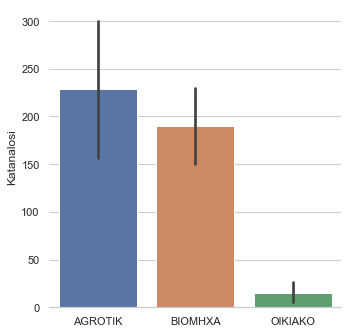

In [33]:
import seaborn as sns
sns.set_theme(style="whitegrid")


g = sns.catplot(
    data=DiagrammaXristwn, kind="bar",
    x="TyposXrhsth", y="Katanalosi"
)
g.despine(left=True)
g.set_axis_labels("", "Katanalosi")


In [31]:
result_TroposPliromis = %sql SELECT PaymentType from Payment
df_TroposPliromis = pd.DataFrame(result_TroposPliromis)

df_TroposPliromis.columns = ['Methodos']



 * sqlite:///Deya.db
Done.
